In [63]:
import pandas as pd
import numpy as np
import math
from lineardatamodels import *
from lineartoydata import *
from lineardatatools import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [535]:
"""Let's define the model here"""
c_x = np.array([1,1])
s_x = np.array([0.1,0.1])#np.array([1,1])
c_t = np.array([0.5])
s_t = np.array([1])#np.array([1])
c_yz = np.array([0.6])
c_yt = np.array([1])
s_y = np.array([1.5])#np.array([1.5])

In [536]:
%autoreload 2
BATCH_SIZE = 500
num_samples = 5000
df = linear_data_df(num_samples, c_x, c_t, c_yz, c_yt, s_x, s_t, s_y)
dataset = LinearDataset(df)
dataloader = LinearDataLoader(dataset, validation_split=0.0)
train_loader, test_loader = dataloader.get_loaders(batch_size=BATCH_SIZE)
#dummy test loader
test_loader, _ = LinearDataLoader(LinearDataset(df[:1]), validation_split=0.0).get_loaders(batch_size=1)

z_dim = 10
input_dim = 2

Training Results - Epoch 1 - y_reconc_loss: 951.1327 x_reconc_loss: 1608.5549 t_reconc_loss: 821.3742 kld_loss: 11.6087 total_loss: 3392.6705 learning rate: 0.0481
Training Results - Epoch 2 - y_reconc_loss: 948.7077 x_reconc_loss: 1428.8104 t_reconc_loss: 754.6508 kld_loss: 3.8168 total_loss: 3135.9856 learning rate: 0.0462
Training Results - Epoch 3 - y_reconc_loss: 940.9790 x_reconc_loss: 1437.0103 t_reconc_loss: 760.9417 kld_loss: 9.7588 total_loss: 3148.6897 learning rate: 0.0445
Training Results - Epoch 4 - y_reconc_loss: 928.3997 x_reconc_loss: 1240.0373 t_reconc_loss: 752.9981 kld_loss: 138.9147 total_loss: 3060.3499 learning rate: 0.0428
Training Results - Epoch 5 - y_reconc_loss: 893.7535 x_reconc_loss: 1102.6686 t_reconc_loss: 719.9151 kld_loss: 276.4237 total_loss: 2992.7608 learning rate: 0.0411
Training Results - Epoch 6 - y_reconc_loss: 897.1227 x_reconc_loss: 869.1329 t_reconc_loss: 699.9638 kld_loss: 370.9073 total_loss: 2837.1266 learning rate: 0.0395
Training Results

Training Results - Epoch 51 - y_reconc_loss: 902.2008 x_reconc_loss: -842.6771 t_reconc_loss: 701.6474 kld_loss: 1320.6053 total_loss: 2081.7763 learning rate: 0.0068
Training Results - Epoch 52 - y_reconc_loss: 904.5922 x_reconc_loss: -828.3262 t_reconc_loss: 700.0010 kld_loss: 1310.1292 total_loss: 2086.3962 learning rate: 0.0065
Training Results - Epoch 53 - y_reconc_loss: 904.0771 x_reconc_loss: -847.8949 t_reconc_loss: 701.9937 kld_loss: 1305.6354 total_loss: 2063.8114 learning rate: 0.0063
Training Results - Epoch 54 - y_reconc_loss: 904.4447 x_reconc_loss: -866.0530 t_reconc_loss: 702.5594 kld_loss: 1319.7467 total_loss: 2060.6979 learning rate: 0.0060
Training Results - Epoch 55 - y_reconc_loss: 902.8287 x_reconc_loss: -841.8794 t_reconc_loss: 700.6343 kld_loss: 1306.9434 total_loss: 2068.5271 learning rate: 0.0058
Training Results - Epoch 56 - y_reconc_loss: 903.2811 x_reconc_loss: -851.9061 t_reconc_loss: 700.8212 kld_loss: 1316.3498 total_loss: 2068.5460 learning rate: 0.005

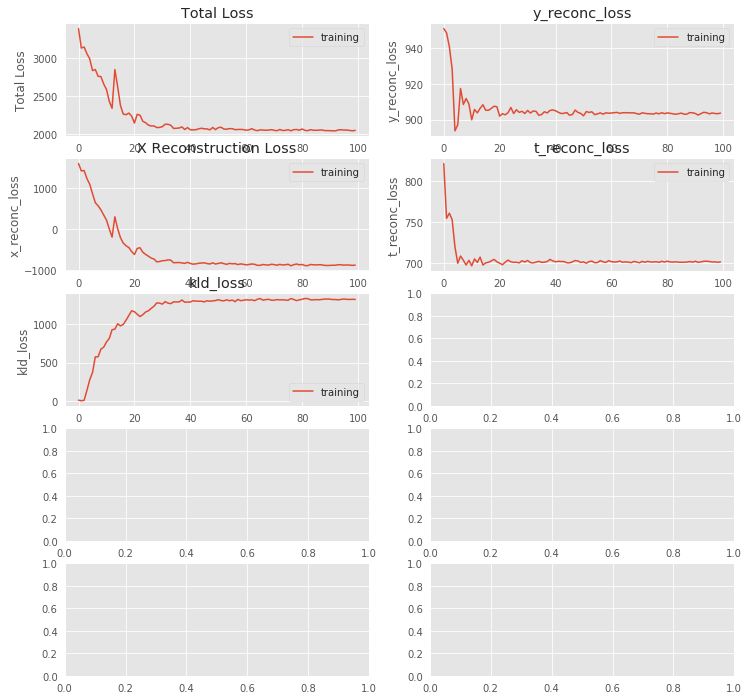

In [550]:
#Running the model
device = 'cpu'
model = run_cevae(num_epochs=100, lr_start=0.05, lr_end=0.001,
        train_loader=train_loader, test_loader=test_loader, input_dim=input_dim,
        plot_curves=True, print_logs=True, device=device, z_dim=z_dim, q_z_xty_nn=True, p_y_zt_nn=True,
        p_x_z_nn = True, p_t_z_nn = True, p_y_zt_std = False, p_x_z_std = False, p_t_z_std = False,
        decoder_hidden_dim=12, encoder_hidden_dim=12)

In [544]:
print(model.decoder.y_nn.weight, torch.exp(model.decoder.y_log_std))
print(model.decoder.t_nn.weight, torch.exp(model.decoder.t_log_std))
print(model.decoder.x_nns[0].weight)
print(model.decoder.x_nns[1].weight)

Parameter containing:
tensor([[-0.0013, -0.0047, -0.0025, -0.0040,  0.6100,  0.0016, -0.0089,  0.0078,
          0.0114, -0.0036,  1.0230]], requires_grad=True) tensor([1.4756], grad_fn=<ExpBackward>)
Parameter containing:
tensor([[-1.1892e-02,  4.7929e-04,  4.0731e-04, -1.0988e-03,  4.7284e-01,
          7.9348e-04,  6.6120e-03, -5.0529e-03, -1.5312e-03,  2.0203e-03]],
       requires_grad=True) tensor([0.9847], grad_fn=<ExpBackward>)
Parameter containing:
tensor([[ 2.1330e-04, -2.6378e-05,  3.0446e-03,  1.6483e-03,  9.9940e-01,
          5.4206e-04, -7.6679e-04, -8.0179e-04,  9.0565e-04,  1.9185e-03]],
       requires_grad=True)
Parameter containing:
tensor([[ 4.2510e-04, -2.1177e-03,  1.0186e-04,  1.2740e-03,  9.9841e-01,
          8.3537e-04,  7.2328e-04, -4.0780e-04, -2.0638e-04,  2.2524e-03]],
       requires_grad=True)


In [545]:
from sklearn.linear_model import LinearRegression
model_reg = LinearRegression(fit_intercept=False).fit(X=df.iloc[:,1:1+input_dim+1],y=df['y'])
model_reg.coef_

array([0.36885848, 0.23859884, 1.02443704])

In [546]:
z_sample, x_sample, t_sample, y_sample = model.decoder.sample(100000)
y_sample.detach()
df_sample = pd.DataFrame(torch.cat([z_sample, x_sample, t_sample, y_sample],1).detach().numpy(),
                        columns=["z"+str(i) for i in range(z_dim)] + ["x"+str(i) for i in range(input_dim)] + \
                        ["t", "y"])
df_sample[['x0','x1','t','y']].cov()

<built-in method size of Tensor object at 0x7fd8fb4afc18>


,x0,x1,t,y
x0,1.010041,0.999444,0.477650,1.095308
x1,0.999444,1.008933,0.477362,1.094397
t,0.477650,0.477362,1.188393,1.506096
y,1.095308,1.094397,1.506096,4.400652


In [547]:
cov = df.cov()
print((cov.loc['t','y'] * cov.loc['x0','x1'] - cov.loc['y','x1'] * cov.loc['x0','t']) \
    / (cov.loc['t','t'] * cov.loc['x0','x1'] - cov.loc['x0','t'] * cov.loc['t','x1']))
display(cov.iloc[1:,1:])
display(df.corr())

1.0227890286285415


,x0,x1,t,y
x0,1.003827,0.994193,0.470000,1.089221
x1,0.994193,1.004086,0.470485,1.088445
t,0.470000,0.470485,1.192506,1.506751
y,1.089221,1.088445,1.506751,4.382092


,z,x0,x1,t,y
z,1.000000,0.995019,0.995184,0.433269,0.522056
x0,0.995019,1.000000,0.990275,0.429575,0.519333
x1,0.995184,0.990275,1.000000,0.429962,0.518896
t,0.433269,0.429575,0.429962,1.000000,0.659129
y,0.522056,0.519333,0.518896,0.659129,1.000000


In [391]:
df1 = linear_data_df(2000, c_x, c_t=0.01, c_yz=c_yz, c_yt=c_yt, s_x=s_x, s_t=0.1, s_y=s_y)
cov = df1.cov()
print(cov.loc['t','t'] * cov.loc['x0','x1'] - cov.loc['x0','t'] * cov.loc['t','x1'])
print(cov.loc['t','y'] * cov.loc['x0','x1'] - cov.loc['y','x1'] * cov.loc['x0','t'])
print((cov.loc['t','y'] * cov.loc['x0','x1'] - cov.loc['y','x1'] * cov.loc['x0','t']) \
    / (cov.loc['t','t'] * cov.loc['x0','x1'] - cov.loc['x0','t'] * cov.loc['t','x1']))
display(cov.iloc[1:,1:])
display(df1.corr())

0.010459802150247945
0.0060786641628241544
0.5811452334860906


,x0,x1,t,y
x0,1.951869,0.990493,0.012727,0.586642
x1,0.990493,1.955520,0.008626,0.628260
t,0.012727,0.008626,0.010671,0.014210
y,0.586642,0.628260,0.014210,2.772950


,z,x0,x1,t,y
z,1.000000,0.697549,0.704466,0.136886,0.377342
x0,0.697549,1.000000,0.506985,0.088187,0.252160
x1,0.704466,0.506985,1.000000,0.059711,0.269797
t,0.136886,0.088187,0.059711,1.000000,0.082606
y,0.377342,0.252160,0.269797,0.082606,1.000000


# Experiment with zdim=10, lots of data and linear model

In [701]:
"""Let's define the model here"""
c_x = np.array([1,2])
s_x = np.array([0.5,0.7])
c_t = np.array([0.5])
s_t = np.array([1])
c_yz = np.array([0.6])
c_yt = np.array([1])
s_y = np.array([1])

In [702]:
"""define all kinds of other things"""
datasizes = [5000]
datasize_times = 20
num_epochs = [200]
lr_start = 0.05
lr_end = 0.001
input_dim = 2
z_dim = 10
folder = "linear_data_zdim10_linear"
name = "linear_data_zdim10_linear"
BATCH_SIZE = 500
binary_t_y = False
p_y_zt_nn = False
q_z_xty_nn = False
dataparameters = [c_x, c_t, c_yz, c_yt, s_x, s_t, s_y]#Be careful that these are the correct way around
track_function = lambda model: model.decoder.y_nn.weight
true_value = c_yt
device = "cpu"

In [556]:
"""Run the training of the model. Skip this cell if you just want to reload the data."""
dfs, models = run_model_for_data_sets(datasizes,datasize_times,num_epochs,lr_start,lr_end,input_dim,z_dim,
                       folder,name,BATCH_SIZE,binary_t_y,p_y_zt_nn,q_z_xty_nn,
                        linear_data_df, dataparameters, track_function, true_value, device)

Creation of the directory data/linear_data_zdim10_linear/ failed. Trying to empty the same folder.
Training data size 5000, run 1
Estimated causal effect: Parameter containing:
tensor([[ 0.0101,  0.0048, -0.0593,  0.6845,  0.0170,  0.0076, -0.0015,  0.0323,
         -0.0039, -0.5071,  1.2320]], requires_grad=True) true value: [1]
Training data size 5000, run 2
Estimated causal effect: Parameter containing:
tensor([[-0.0660, -0.6094, -0.0985, -0.0343, -0.0599,  0.0121,  0.0013,  0.0252,
          0.0781, -0.0228,  0.9777]], requires_grad=True) true value: [1]
Training data size 5000, run 3
Estimated causal effect: Parameter containing:
tensor([[ 0.0166,  0.0210,  0.0165,  0.0051,  0.0180, -0.2065,  0.0200, -0.0064,
         -0.6338, -0.0427,  0.9841]], requires_grad=True) true value: [1]
Training data size 5000, run 4
Estimated causal effect: Parameter containing:
tensor([[-0.1334, -0.5704,  0.0411, -0.0321, -0.0297, -0.0179,  0.0334,  0.0061,
         -0.0097,  0.0181,  1.0175]], requi

In [703]:
dfs, models = load_dfs_models(folder, name,
                   input_dim=input_dim, z_dim=z_dim, device=device, binary_t_y=binary_t_y,
                  p_y_zt_nn=p_y_zt_nn, q_z_xty_nn=q_z_xty_nn)

In [705]:
datasize = datasizes[0]
AIDs = []
for i in range(datasize_times):
    model = models[datasize][i]
    AID, py_dot_model, py_dot_true, t_sample= calculate_AID(models[5000][i], c_yt, c_yz, s_y, c_t, s_t,500,500)
    AIDs.append(AID)
    print("{} calculated".format(i))

0 calculated
1 calculated
2 calculated
3 calculated
4 calculated
5 calculated
6 calculated
7 calculated
8 calculated
9 calculated
10 calculated
11 calculated
12 calculated
13 calculated
14 calculated
15 calculated
16 calculated
17 calculated
18 calculated
19 calculated


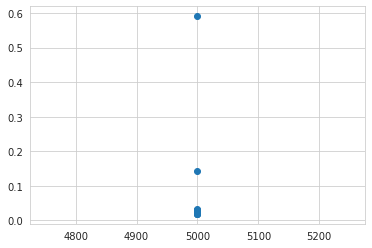

In [706]:
plt.figure()
plt.plot([5000]*datasize_times,AIDs,'o')

# Experiment with zdim=10, lots of data and neural network model

In [707]:
"""Let's define the model here"""
c_x = np.array([1,2])
s_x = np.array([0.5,0.7])
c_t = np.array([0.5])
s_t = np.array([1])
c_yz = np.array([0.6])
c_yt = np.array([1])
s_y = np.array([1])

In [708]:
"""define all kinds of other things"""
datasizes = [5000]
datasize_times = 20
num_epochs = [200]
lr_start = 0.05
lr_end = 0.001
input_dim = 2
z_dim = 10
folder = "linear_data_zdim10_nn"
name = "linear_data_zdim10_nn"
BATCH_SIZE = 500
binary_t_y = False
p_y_zt_nn = True
q_z_xty_nn = True
p_x_z_nn = True
p_t_z_nn = True
p_y_zt_std = True
p_x_z_std = True
p_t_z_std = True
decoder_hidden_dim=12
encoder_hidden_dim=12
dataparameters = [c_x, c_t, c_yz, c_yt, s_x, s_t, s_y]#Be careful that these are the correct way around
track_function = lambda model: model.decoder.y_nn.weight
true_value = c_yt
device = "cpu"

In [560]:
"""Run the training of the model. Skip this cell if you just want to reload the data."""
dfs, models = run_model_for_data_sets(datasizes,datasize_times,num_epochs,lr_start,lr_end,input_dim,z_dim,
                       folder,name,BATCH_SIZE,binary_t_y,p_y_zt_nn,q_z_xty_nn,
                        linear_data_df, dataparameters, track_function, true_value, device,
                        p_x_z_nn = p_x_z_nn, p_t_z_nn = p_t_z_nn, p_y_zt_std = p_y_zt_std, p_x_z_std = p_x_z_std,
                        p_t_z_std = p_t_z_std, decoder_hidden_dim=decoder_hidden_dim, encoder_hidden_dim=encoder_hidden_dim)

Training data size 5000, run 1
Estimated causal effect: Parameter containing:
tensor([[-0.2006, -0.2824, -0.0520, -0.0519,  0.0909, -0.0128,  0.0715,  0.1081,
          0.1096, -0.2661, -0.1911]], requires_grad=True) true value: [1]
Training data size 5000, run 2
Estimated causal effect: Parameter containing:
tensor([[ 0.1894, -0.1357, -0.0312, -0.2773,  0.1734,  0.1544,  0.1342, -0.2969,
          0.0491, -0.2865,  0.2619]], requires_grad=True) true value: [1]
Training data size 5000, run 3
Estimated causal effect: Parameter containing:
tensor([[-0.1198, -0.0842, -0.0584,  0.1936, -0.2928, -0.0689,  0.1405,  0.2908,
          0.1861,  0.2182, -0.2319]], requires_grad=True) true value: [1]
Training data size 5000, run 4
Estimated causal effect: Parameter containing:
tensor([[-0.0726, -0.2024, -0.0325,  0.1589, -0.2753,  0.0310,  0.1538,  0.0719,
         -0.2157, -0.2771,  0.0134]], requires_grad=True) true value: [1]
Training data size 5000, run 5
Estimated causal effect: Parameter co

In [709]:
dfs, models = load_dfs_models(folder, name,
                input_dim=input_dim, z_dim=z_dim, device=device, binary_t_y=binary_t_y,
                p_y_zt_nn=p_y_zt_nn, q_z_xty_nn=q_z_xty_nn, p_x_z_nn = p_x_z_nn, p_t_z_nn = p_t_z_nn, 
                p_y_zt_std = p_y_zt_std, p_x_z_std = p_x_z_std, p_t_z_std = p_t_z_std,
                encoder_hidden_dim=encoder_hidden_dim,decoder_hidden_dim=decoder_hidden_dim)

In [612]:
def calculate_AID(model, c_yt, c_yz, s_y, c_t, s_t, nsample_t, nsample_z):
    t_sample = np.random.randn(nsample_t)*np.sqrt(c_t**2 + s_t**2)
    
    ngrid = 100
    lim = 6
    y_len = 2*lim/ngrid
    y_range = np.linspace(-lim,lim,ngrid)
    py_dot_model = np.zeros((nsample_t, ngrid))
    py_dot_true = scipy.stats.norm.pdf(y_range[None,:], loc = t_sample[:,None] * c_yt, scale = np.sqrt(c_yz**2+s_y**2))
    
    #Sample from p(z) to get p(y|do(t))_model
    for i in range(len(t_sample)):
        t = t_sample[i]
        z_sample = torch.Tensor(np.random.randn(nsample_z, model.z_dim))
        x_pred, t_pred, y_pred, x_std, t_std, y_std = model.decoder(z_sample, torch.Tensor([[t]*nsample_z]).T)
        py_dot_model[i,:] = scipy.stats.norm.pdf(y_range[None,:], loc=y_pred.detach().numpy(),
                                                  scale=y_std.detach().numpy()).mean(0)
    
    causal_dist = np.abs(py_dot_model - py_dot_true).sum(axis=1)*y_len
    AID = causal_dist.mean()
    
    return AID, py_dot_model, py_dot_true, t_sample

In [693]:
AID, py_dot_model, py_dot_true, t_sample= calculate_AID(models[5000][3], c_yt, c_yz, s_y, c_t, s_t, 500,500)
print(AID)

0.026279357366556177


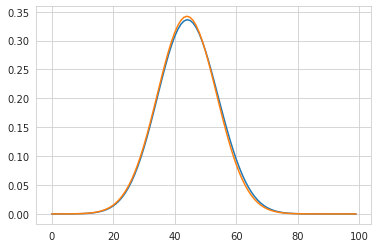

In [695]:
import matplotlib.pyplot as plt
plt.plot(py_dot_model[2])
plt.plot(py_dot_true[2])

In [710]:
datasize = datasizes[0]
AIDs = []
for i in range(datasize_times):
    model = models[datasize][i]
    AID, py_dot_model, py_dot_true, t_sample= calculate_AID(models[5000][i], c_yt, c_yz, s_y, c_t, s_t, 500,500)
    AIDs.append(AID)
    print("{} calculated".format(i))

0 calculated
1 calculated
2 calculated
3 calculated
4 calculated
5 calculated
6 calculated
7 calculated
8 calculated
9 calculated
10 calculated
11 calculated
12 calculated
13 calculated
14 calculated
15 calculated
16 calculated
17 calculated
18 calculated
19 calculated


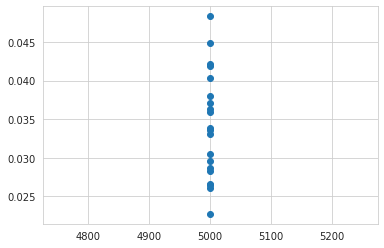

In [711]:
plt.figure()
plt.plot([5000]*datasize_times,AIDs,'o')